In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats as ss
import pingouin as pg

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA

In [3]:
sales = pd.read_csv(Path.cwd() / 'data' / 'sales.csv', index_col=['ID'])
sales.head(), sales.shape

(    X1  X2  X3  X4     Y1     Y2     Y3
 ID                                     
 1    9  12   9  20   93.0   96.0   97.8
 2    7  10  10  15   88.8   91.8   96.8
 3    8  12   9  26   95.0  100.3   99.0
 4   12  14  12  29  101.3  103.8  106.8
 5   10  15  12  32  102.0  107.8  103.0,
 (50, 7))

In [4]:
xlist = ['X1', 'X2', 'X3', 'X4']
ylist = ['Y1', 'Y2', 'Y3']

In [5]:
exam = sales[xlist]
perform = sales[ylist]

In [6]:
scaler = StandardScaler()
zexam = scaler.fit_transform(exam)
zperform = scaler.fit_transform(perform)

In [7]:
ca = CCA(n_components=3).fit(exam, perform)
exam_ca, perform_ca = ca.transform(exam, perform)
exam_ca.shape, perform_ca.shape

((50, 3), (50, 3))

In [8]:
ca.score(exam, perform)

0.715702512842161

In [9]:
cc_res = pd.DataFrame({'CCX_1':exam_ca[:,0], 'CCY_1':perform_ca[:,0],
                       'CCX_2':exam_ca[:,1], 'CCY_2':perform_ca[:,1],
                       'CCX_3':exam_ca[:,2], 'CCY_3':perform_ca[:,2]})

In [10]:
cc_res.head()

,CCX_1,CCY_1,CCX_2,CCY_2,CCX_3,CCY_3
0,-1.296365,-1.586000,-0.062160,0.122380,-0.074753,0.258465
1,-1.871090,-2.280234,0.465646,0.135849,0.371038,0.016694
2,-0.880385,-1.080877,-0.430363,-0.016271,0.080729,0.211404
3,0.165755,0.624818,0.590930,0.707007,0.146007,-0.101087
4,0.281532,0.379810,0.107278,0.109038,0.656132,0.314689


In [11]:
cc_res.corr().round(3)

,CCX_1,CCY_1,CCX_2,CCY_2,CCX_3,CCY_3
CCX_1,1.000,0.994,-0.000,-0.000,-0.000,-0.000
CCY_1,0.994,1.000,-0.000,-0.000,0.000,-0.000
CCX_2,-0.000,-0.000,1.000,0.874,-0.000,0.000
CCY_2,-0.000,-0.000,0.874,1.000,-0.000,0.000
CCX_3,-0.000,0.000,-0.000,-0.000,1.000,0.382
CCY_3,-0.000,-0.000,0.000,0.000,0.382,1.000


<AxesSubplot:xlabel='CCX_1', ylabel='CCY_1'>

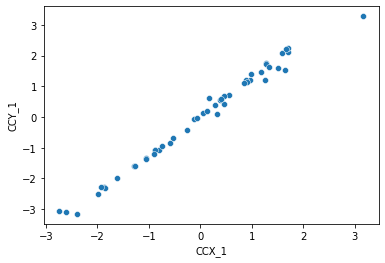

In [12]:
sns.scatterplot(data=cc_res, x='CCX_1', y='CCY_1')

In [13]:
ca.x_weights_, ca.y_weights_

(array([[ 0.35650258,  0.50840944, -0.64164549],
        [ 0.14687268, -0.39859481,  0.35125097],
        [ 0.24573596,  0.68906894,  0.68175998],
        [ 0.88935267, -0.32836873,  0.01082378]]),
 array([[ 0.72465084,  0.28244397,  0.62857503],
        [ 0.3792581 , -0.92503949, -0.02156922],
        [ 0.57536463,  0.25402232, -0.77744981]]))

In [14]:
np.dot(zexam, ca.x_weights_).round(2)

array([[-1.31, -0.23, -0.38],
       [-1.89,  0.23,  0.06],
       [-0.89, -0.55, -0.21],
       [ 0.17,  0.62,  0.31],
       [ 0.28,  0.14,  0.75],
       [-0.81,  0.28,  0.31],
       [-0.88, -0.38, -0.37],
       [ 3.2 ,  0.97,  0.94],
       [ 0.4 ,  0.26,  1.28],
       [ 1.26, -0.24,  0.09],
       [ 0.55,  0.17,  0.63],
       [-0.13, -1.48, -0.23],
       [ 0.97,  0.3 , -0.35],
       [-0.06,  0.09,  0.23],
       [ 0.05, -0.23, -1.55],
       [-2.43, -1.31, -1.66],
       [ 0.13,  0.31, -0.05],
       [ 0.47, -0.03,  0.16],
       [-0.27,  0.  ,  1.79],
       [ 0.47,  0.65, -0.52],
       [-1.88, -0.59, -1.19],
       [ 0.39, -0.67,  0.84],
       [-2.01, -0.4 , -1.34],
       [ 0.89,  0.25,  0.43],
       [ 1.6 ,  0.23,  0.19],
       [-1.06, -1.2 , -0.87],
       [ 1.29,  0.33,  0.2 ],
       [ 1.66, -0.84,  0.55],
       [-1.28,  1.28,  0.86],
       [ 1.19, -0.93,  0.81],
       [ 1.72,  0.19, -1.2 ],
       [-1.96,  0.4 , -1.47],
       [-0.53, -0.41,  0.92],
       [-1

In [15]:
cc_res[['CCX_1', 'CCX_2', 'CCX_3']].values.round(2)

array([[-1.3 , -0.06, -0.07],
       [-1.87,  0.47,  0.37],
       [-0.88, -0.43,  0.08],
       [ 0.17,  0.59,  0.15],
       [ 0.28,  0.11,  0.66],
       [-0.81,  0.38,  0.4 ],
       [-0.87, -0.27, -0.12],
       [ 3.17,  0.56,  0.11],
       [ 0.4 ,  0.21,  1.13],
       [ 1.25, -0.39, -0.1 ],
       [ 0.55,  0.1 ,  0.48],
       [-0.13, -1.45,  0.12],
       [ 0.96,  0.18, -0.6 ],
       [-0.06,  0.1 ,  0.22],
       [ 0.05, -0.24, -1.5 ],
       [-2.4 , -0.99, -0.89],
       [ 0.13,  0.29, -0.14],
       [ 0.47, -0.08,  0.07],
       [-0.27,  0.03,  1.82],
       [ 0.46,  0.58, -0.74],
       [-1.86, -0.35, -0.69],
       [ 0.39, -0.71,  0.9 ],
       [-1.99, -0.14, -0.86],
       [ 0.88,  0.13,  0.2 ],
       [ 1.59,  0.03, -0.17],
       [-1.05, -1.05, -0.4 ],
       [ 1.28,  0.16, -0.12],
       [ 1.64, -1.03,  0.4 ],
       [-1.27,  1.42,  0.83],
       [ 1.18, -1.07,  0.77],
       [ 1.7 , -0.03, -1.56],
       [-1.94,  0.64, -1.17],
       [-0.53, -0.34,  1.1 ],
       [-1

In [16]:
zexam

array([[-0.56354707, -0.65059846, -0.73650484, -0.93560098],
       [-1.07586259, -1.24747777, -0.26438635, -1.41490476],
       [-0.81970483, -0.65059846, -0.73650484, -0.36043644],
       [ 0.20492621, -0.05371914,  0.67985062, -0.07285417],
       [-0.30738931,  0.24472052,  0.67985062,  0.21472809],
       [-0.30738931, -0.05371914,  0.20773213, -0.83974022],
       [-0.56354707, -0.65059846, -0.73650484, -0.4562972 ],
       [ 1.74187277,  1.73691881,  2.09620607,  2.03608246],
       [-0.30738931,  0.84159984,  1.1519691 ,  0.11886734],
       [ 0.71724173,  1.14003949,  0.20773213,  0.88575339],
       [ 0.20492621,  0.84159984,  0.67985062,  0.21472809],
       [-0.30738931,  1.14003949, -1.20862332,  0.11886734],
       [ 1.22955725,  0.84159984,  0.20773213,  0.40644961],
       [-0.81970483, -1.24747777,  0.20773213,  0.40644961],
       [ 0.46108397, -1.24747777, -1.20862332,  0.40644961],
       [-1.07586259, -1.54591743, -2.62497877, -1.319044  ],
       [-0.05123155, -0.

In [17]:
ca.x_loadings_, ca.y_loadings_

(array([[ 0.47700412,  0.3428337 , -0.78658428],
        [ 0.54294989, -0.37578659,  0.08265564],
        [ 0.48300563,  0.83504116,  0.68210777],
        [ 0.71007877, -0.30609674,  0.11318464]]),
 array([[ 0.60618733,  0.02913713,  0.62857503],
        [ 0.58728876, -0.9163474 , -0.02156922],
        [ 0.58743935,  0.56732359, -0.77744981]]))

In [18]:
# as Y = X @ coef_.T + intercept_
ca.coef_, ca.intercept_

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(array([[-2.09651868, -2.0020312 ,  5.22974756],
        [ 2.44562458,  4.65347229, -2.20295188],
        [ 3.4772087 , -4.75117697,  0.65765107],
        [ 3.43692981,  9.3920797 ,  1.62231936]]),
 array([ 98.836, 106.622, 102.81 ]))

In [19]:
cc_res['CCX_1']

0    -1.296365
1    -1.871090
2    -0.880385
3     0.165755
4     0.281532
5    -0.805079
6    -0.874379
7     3.169815
8     0.398770
9     1.249250
10    0.549122
11   -0.132091
12    0.964679
13   -0.062291
14    0.045173
15   -2.404338
16    0.126908
17    0.466884
18   -0.267819
19    0.464302
20   -1.857648
21    0.385070
22   -1.993831
23    0.884324
24    1.588299
25   -1.052295
26    1.277317
27    1.644826
28   -1.267342
29    1.175829
30    1.703425
31   -1.936967
32   -0.526513
33   -1.060658
34    1.705812
35    1.509600
36   -0.592813
37    0.314677
38    1.666690
39    1.282091
40    0.392764
41   -0.895936
42    0.901613
43   -2.745320
44   -0.736313
45    1.339958
46   -1.623677
47   -2.603555
48    0.850557
49    0.981660
Name: CCX_1, dtype: float64

In [20]:
exam.shape, perform.shape

((50, 4), (50, 3))

In [21]:
scaler = StandardScaler()
zexam = scaler.fit_transform(exam)
zperform = scaler.fit_transform(perform)

In [22]:
ca = CCA(n_components=1).fit(exam, perform)
ca.x_loadings_, ca.y_loadings_

(array([[0.47700412],
        [0.54294989],
        [0.48300563],
        [0.71007877]]),
 array([[0.60618733],
        [0.58728876],
        [0.58743935]]))

In [23]:
ca.coef_, ca.intercept_

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(array([[1.58565425, 2.11972737, 0.98684989],
        [0.65326114, 0.8732897 , 0.40656448],
        [1.09298582, 1.46112052, 0.68023211],
        [3.95566796, 5.28799872, 2.46185479]]),
 array([ 98.836, 106.622, 102.81 ]))

In [24]:
ca.get_feature_names_out()

array(['cca0'], dtype=object)

In [25]:
# exam에 cca를 적용하여 perform 스타일로 변형된 형태라고 보면 되는듯
ca.predict(exam)

array([[ 93.07002169,  98.91395013,  99.22147805],
       [ 90.51375318,  95.49669045,  97.63055536],
       [ 94.92021976, 101.38732381, 100.37296979],
       [ 99.57324474, 107.60756028, 103.26883262],
       [100.08820034, 108.29596098, 103.58932108],
       [ 95.25516358, 101.83508195, 100.58142587],
       [ 94.94693288, 101.42303432, 100.389595  ],
       [112.93472129, 125.46939085, 111.58449899],
       [100.60964985, 108.99304283, 103.91385109],
       [104.39242363, 114.0499139 , 106.26810322],
       [101.27839023, 109.88702541, 104.33004924],
       [ 98.24848666, 105.83660299, 102.44435441],
       [103.12670355, 112.35787952, 105.48036798],
       [ 98.55894358, 106.25162665, 102.6375708 ],
       [ 99.03692266, 106.89059655, 102.93504649],
       [ 88.14197303,  92.3260577 ,  96.15445111],
       [ 99.40046435, 107.37658476, 103.16130078],
       [100.91261025, 109.39804502, 104.10240192],
       [ 97.64479208, 105.02957465, 102.06863825],
       [100.90112324, 109.38268

In [26]:
ca.score(exam, perform)

0.8839526913506086

In [27]:
perform

,Y1,Y2,Y3
ID,,,
1,93.0,96.0,97.8
2,88.8,91.8,96.8
3,95.0,100.3,99.0
4,101.3,103.8,106.8
5,102.0,107.8,103.0
6,95.8,97.5,99.3
7,95.5,99.5,99.0
8,110.8,122.0,115.3
9,102.8,108.3,103.8


In [30]:
# 표준화 하나 안하나 결과는 동일
ca = CCA(n_components=1).fit(exam, perform)
ca.x_loadings_, ca.y_loadings_

(array([[0.47700412],
        [0.54294989],
        [0.48300563],
        [0.71007877]]),
 array([[0.60618733],
        [0.58728876],
        [0.58743935]]))

In [31]:
ca.x_weights_, ca.y_weights_

(array([[0.35650258],
        [0.14687268],
        [0.24573596],
        [0.88935267]]),
 array([[0.72465084],
        [0.3792581 ],
        [0.57536463]]))

In [34]:
X_c, y_c = ca.transform(exam, perform)
X_c

array([[-1.29636467],
       [-1.87109041],
       [-0.88038471],
       [ 0.1657547 ],
       [ 0.28153215],
       [-0.80507931],
       [-0.8743788 ],
       [ 3.16981493],
       [ 0.39876962],
       [ 1.2492505 ],
       [ 0.5491225 ],
       [-0.1320906 ],
       [ 0.9646787 ],
       [-0.06229058],
       [ 0.04517343],
       [-2.40433765],
       [ 0.1269085 ],
       [ 0.4668842 ],
       [-0.26781923],
       [ 0.46430157],
       [-1.85764838],
       [ 0.38506965],
       [-1.99383056],
       [ 0.88432418],
       [ 1.58829921],
       [-1.05229472],
       [ 1.27731678],
       [ 1.64482572],
       [-1.2673416 ],
       [ 1.17582887],
       [ 1.70342478],
       [-1.93696663],
       [-0.52651342],
       [-1.06065783],
       [ 1.70581179],
       [ 1.50960033],
       [-0.59281338],
       [ 0.31467736],
       [ 1.66669048],
       [ 1.2820908 ],
       [ 0.39276372],
       [-0.89593594],
       [ 0.90161325],
       [-2.74531982],
       [-0.73631285],
       [ 1

In [38]:
np.dot(exam, ca.x_loadings_)

array([[29.35706183],
       [24.2497656 ],
       [33.14053031],
       [39.71369978],
       [41.43287772],
       [32.59605577],
       [32.90745566],
       [62.90417362],
       [42.29170438],
       [49.45728963],
       [43.47278576],
       [40.41962612],
       [46.31795415],
       [38.7012719 ],
       [39.63727563],
       [22.00186632],
       [39.79802653],
       [43.01416262],
       [37.56775531],
       [41.82440691],
       [25.31766087],
       [43.49383956],
       [23.92188583],
       [45.9372798 ],
       [51.4372534 ],
       [32.62714068],
       [48.85439547],
       [53.56416101],
       [27.59594415],
       [50.07971295],
       [52.09376587],
       [23.13833514],
       [35.96846589],
       [30.08999845],
       [52.46958689],
       [51.01016244],
       [33.91873536],
       [39.3607366 ],
       [52.38040681],
       [49.60603752],
       [42.52477902],
       [33.57514742],
       [46.52064479],
       [18.18998576],
       [34.38117949],
       [47

In [39]:
np.dot(perform, ca.y_loadings_)

array([[170.20671091],
       [164.60667198],
       [174.64935446],
       [185.10587222],
       [185.64708886],
       [173.66612761],
       [174.48261712],
       [206.54654173],
       [186.89563459],
       [195.42791594],
       [188.19714926],
       [184.89468932],
       [191.66638441],
       [182.36964884],
       [183.84739532],
       [160.12250451],
       [183.63704797],
       [188.49071834],
       [179.53012308],
       [184.60194848],
       [165.89288709],
       [189.00253327],
       [163.64229123],
       [192.63980786],
       [199.95487322],
       [173.91229966],
       [197.07312259],
       [196.77910174],
       [167.90335693],
       [196.88706502],
       [199.34891177],
       [164.89086707],
       [177.89856708],
       [170.81874853],
       [200.82658295],
       [195.24681269],
       [175.00443851],
       [181.12501061],
       [201.21267246],
       [197.36669167],
       [187.30106715],
       [174.60215319],
       [191.8880408 ],
       [158

In [41]:
ca.coef_, ca.intercept_

(array([[1.58565425, 2.11972737, 0.98684989],
        [0.65326114, 0.8732897 , 0.40656448],
        [1.09298582, 1.46112052, 0.68023211],
        [3.95566796, 5.28799872, 2.46185479]]),
 array([ 98.836, 106.622, 102.81 ]))

In [46]:
np.dot(exam, ca.coef_)

array([[111.06025358, 148.46708178,  69.11960757],
       [ 87.8970688 , 117.50217456,  54.703737  ],
       [133.2086071 , 178.07534674,  82.90388642],
       [156.00370773, 208.54819333,  97.09067565],
       [165.35266426, 221.04602445, 102.90910471],
       [120.09406972, 160.54362831,  74.74190543],
       [130.83859339, 174.90707539,  81.42888152],
       [259.74085271, 347.22562915, 161.65266359],
       [163.7965044 , 218.96572564, 101.94061099],
       [200.2517546 , 267.69967356, 124.62894913],
       [169.83049505, 227.03205859, 105.69593345],
       [158.98483645, 212.53341276,  98.9460149 ],
       [182.99146215, 244.62584499, 113.8868105 ],
       [165.73340015, 221.55499813, 103.14606001],
       [170.38271394, 227.77027344, 106.03961314],
       [ 85.73454653, 114.611281  ,  53.35786675],
       [163.88554926, 219.0847622 , 101.99602906],
       [177.05907544, 236.69533776, 110.19472238],
       [149.95278176, 200.45922098,  93.3248133 ],
       [156.88744067, 209.72958

In [52]:
np.corrcoef(X_c.reshape(1, -1), y_c.reshape(1, -1))

array([[1.       , 0.9941526],
       [0.9941526, 1.       ]])